#### **Analisis de caracteristicas demográficas y socioeconomicas de los estudiantes que abandonan sus estudios.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

**Carga de datos**

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
print('Numero de características de todo el dataset:',len(df.columns))

Numero de características de todo el dataset: 35


**Extraer características correspondientes demográficas y socioeconómicas de estudiantes que han abandonado los estudios**

In [17]:
demographic_features = df.loc[df['Target'] == 'Dropout', ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']]

socioeconomics_features = df.loc[df['Target']=='Dropout', ["Father's qualification","Mother's qualification","Father's occupation",
                                     "Mother's occupation",'Educational special needs','Debtor','Tuition fees up to date',
                                     'Scholarship holder']]

In [18]:
print('Numero de características demográficas:',len(demographic_features.columns))
print('Numero de características socioeconómicas:',len(socioeconomics_features.columns))

Numero de características demográficas: 6
Numero de características socioeconómicas: 8


**Correlaciones entre caracteristicas en ambos grupos**

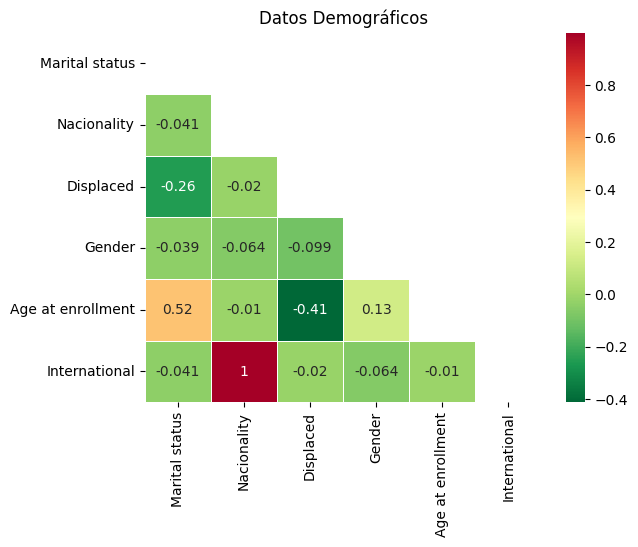

In [20]:
# Mapa de correlaciones entre caractersticas demogréficas
corr_demographic = demographic_features.corr(method='spearman')
mask = np.triu(np.ones_like(corr_demographic, dtype=bool))
sns.heatmap(data=corr_demographic,mask=mask,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos Demográficos')
plt.show()

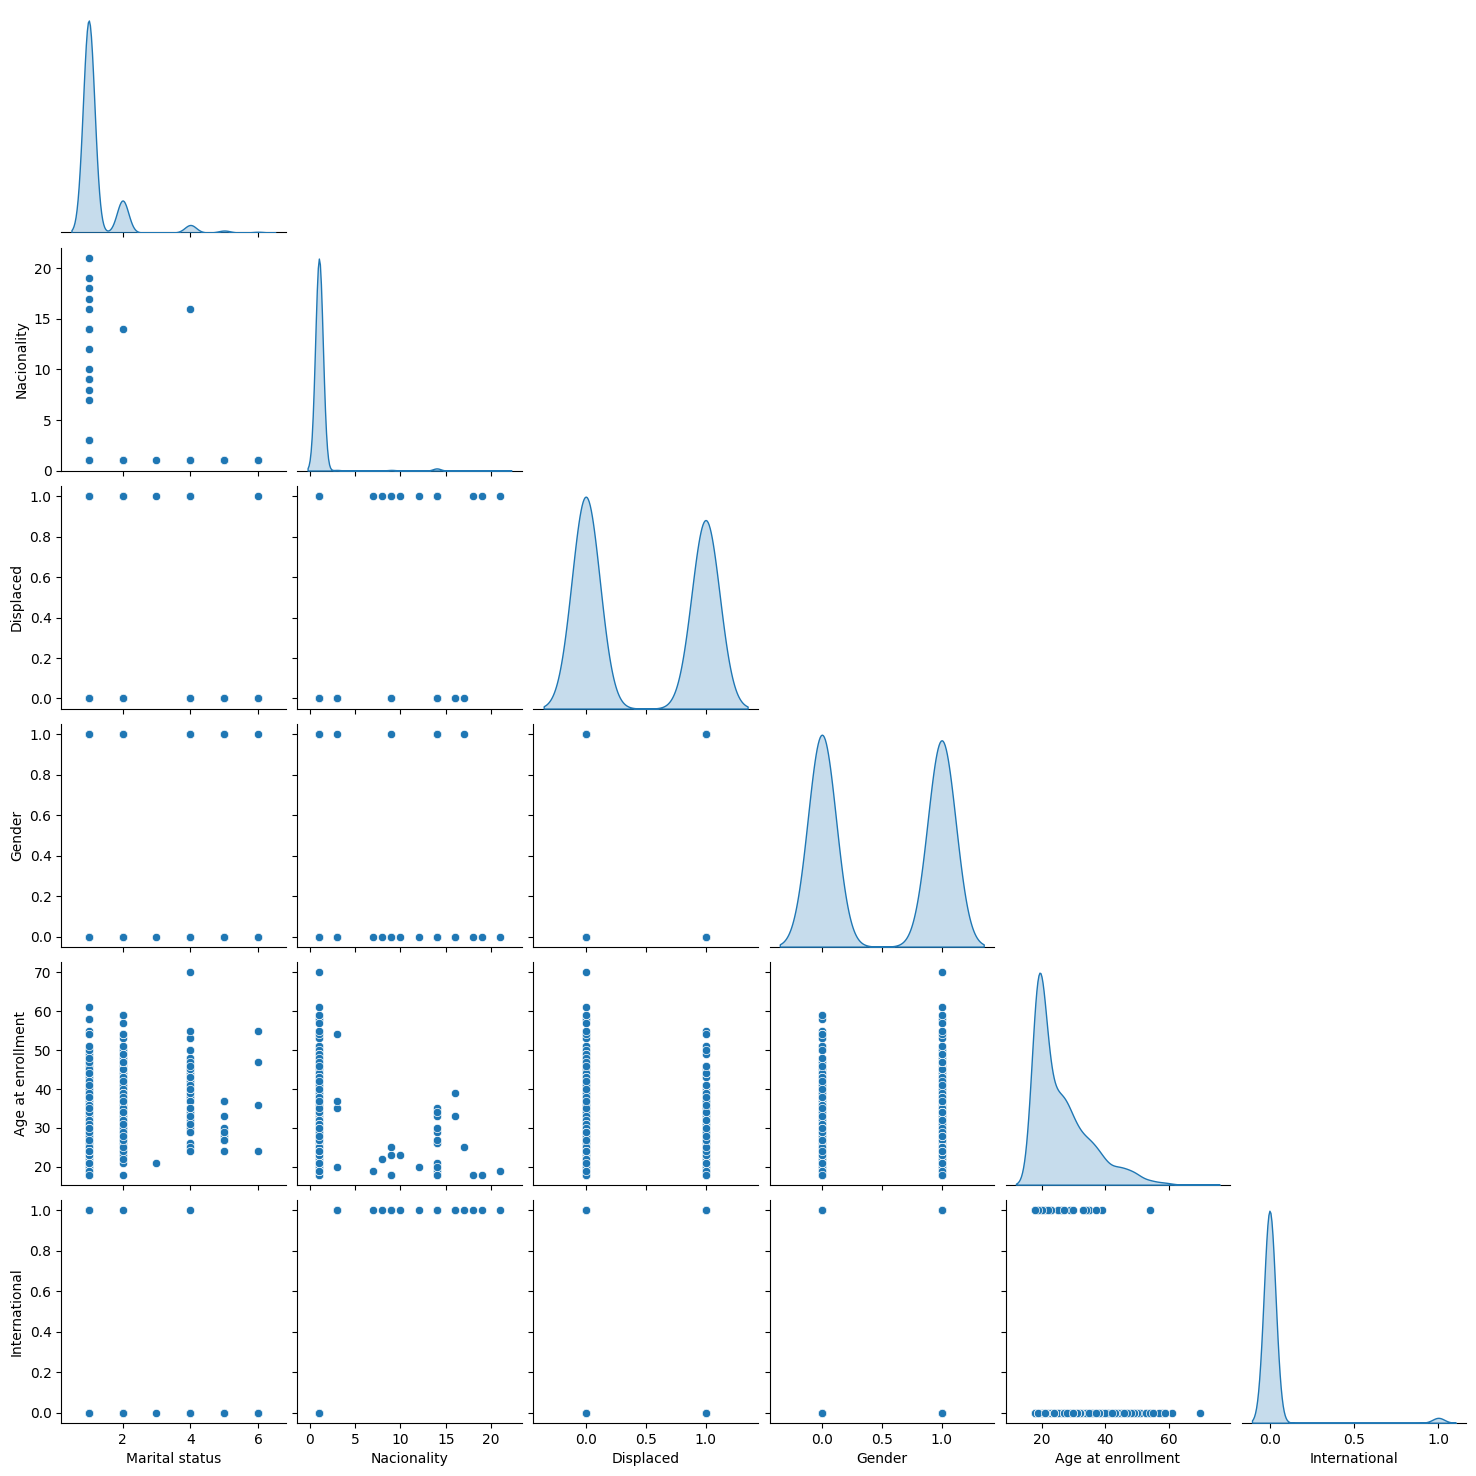

In [21]:
sns.pairplot(demographic_features, diag_kind="kde", corner=True)

Podemos obsevar como entre las características demograficas, encontramos algunas relaciones interesantes:
- La nacionalidad se ve fuertemente influenciada con la característica internacional. Los estudiantes internacionales provienen de otros países a estudiar (mas adelante veremos si influye en la tasa de abandono escolar).
- El año de matriculación (osea, la edad de los estudiantes a la hora de inscribirse en sus estudios), se ve medianamente influenciada por el estado marital. Los estudiantes con mayor edad (>25) contraen algun tipo de unión especial o separación, mientras que los jovenes permanecen solteros o casados.
- Los estudiantes no locales (osea,no portugueses), tienden a inscribírse/matricularse mas jovenes (<30).
- El resto de caracteristicas no presentan unas correlaciónes significativa.

In [22]:
def pie_plot_demographic(feature1: str, feature2: str,num_features_show: int):
    """Mostramos un grafico de pie (tarta) pasadas dos características demográficas y
        el numero de caracteristicas a mostrar.

    Args:
        feature1 (str): Primera caracteristica demografica
        feature2 (str): Segunda característica demografica
        num_features_show (int): numero de característacas a mostrar (recomendamos no mas de 3)

    return: retorna el grafico.
    """
    data=demographic_features[[feature1, feature2]].value_counts()
    labels = [str(label) for label in data.index][:num_features_show]
    sizes = data.values
    sizes = sorted(sizes, reverse=True)[:num_features_show]
    myexplode = [0.1]*len(sizes)
    plt.pie(sizes, labels=labels,explode=myexplode, autopct='%1.0f%%')
    plt.title(f'{feature1} VS {feature2}')
    plt.show()

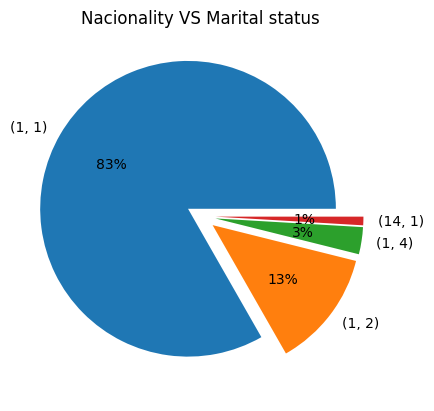

In [23]:
pie_plot_demographic('Nacionality', 'Marital status', 4)

**Observaciones correspondientes a nacionalidad y estado marital**
- El 83% corresponde a estudiantes locales (Portugueses) solteros, el 13% a locales casados y el 3% a locales divorciados.
- El resto comprenden estudiantes de otras nacionalidades tanto solteros como de otros estados maritales.

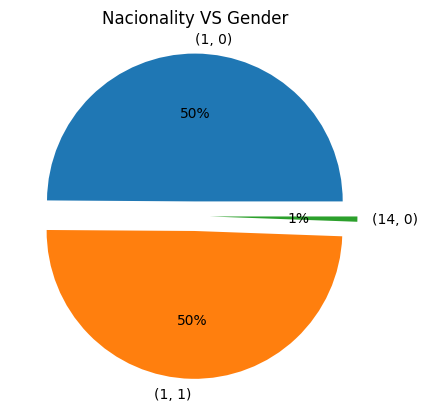

In [24]:
pie_plot_demographic('Nacionality', 'Gender', 3)

**Proporcion de nacionalidad con respecto al genero**
- El 50% son locales femeninos, el 50% locales masculinos y el 1% lo comprenden de otras nacionalidades (brasileños femeninos).

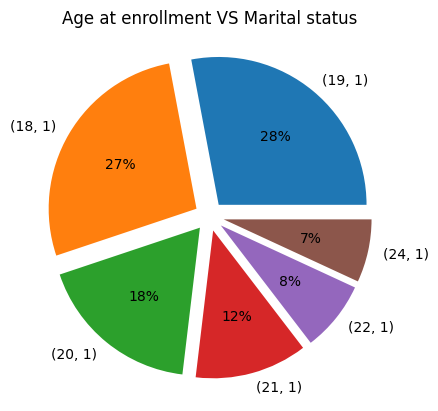

In [25]:
pie_plot_demographic('Age at enrollment', 'Marital status', 6)

**Proporcion entre el año de inscripcion a los cursos y el estado marital**
- Se puede observar como todas las proporciones comprenden edades entre 18-24 años (jovenes) cuyo estado marital es soltero.

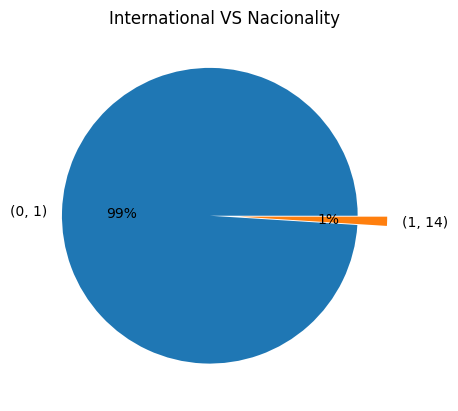

In [28]:
pie_plot_demographic('International', 'Nacionality', 2)

**Proporcion de estudiantes internacionales frente a nacionalidad**
- La mayoria como dijimos son Portugueses nacionales, el 1% con internacionales brasileños

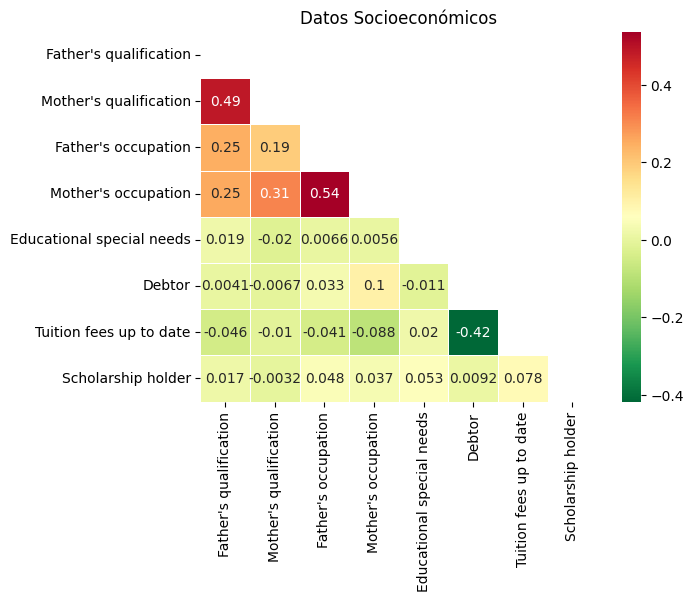

In [30]:
# Mapa de correlaciones entre caractersticas socioeconomicas
corr_socioeconomics = socioeconomics_features.corr(method='spearman')
mask = np.triu(np.ones_like(corr_socioeconomics, dtype=bool))
sns.heatmap(data=corr_socioeconomics,mask=mask,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos Socioeconómicos')
plt.show()

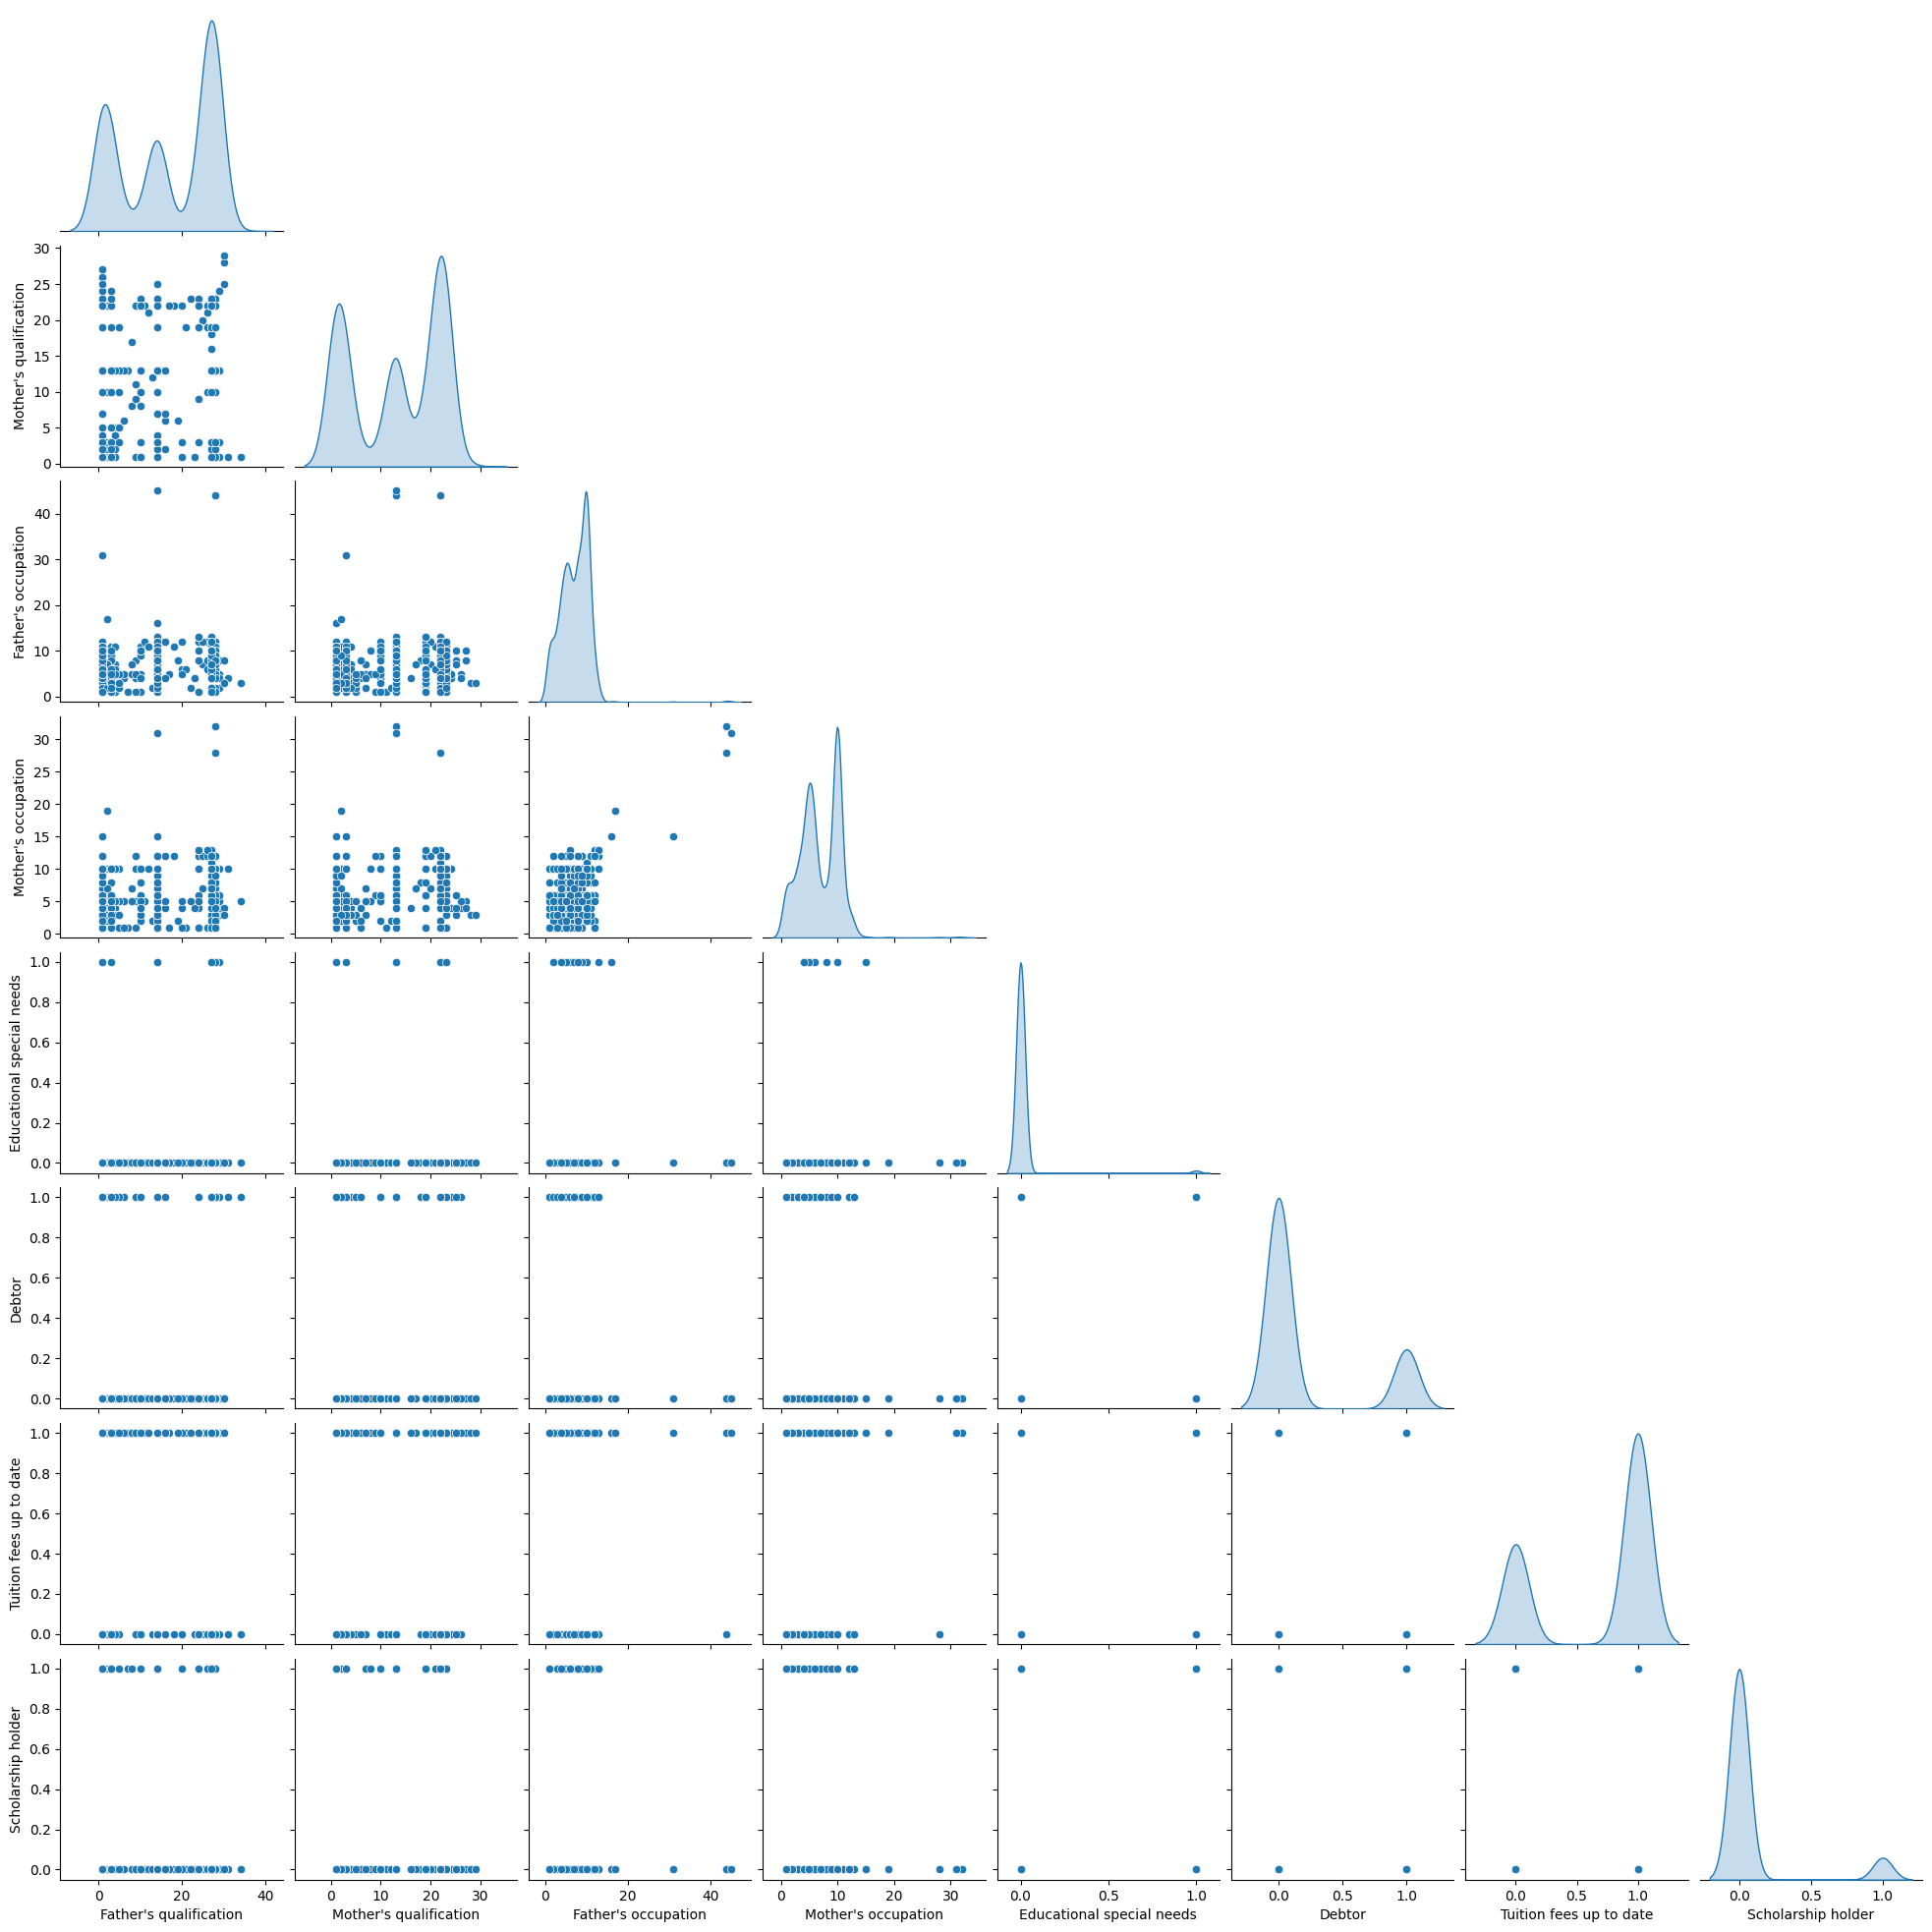

In [31]:
sns.pairplot(socioeconomics_features, diag_kind="kde", corner=True)

- Referente a la ocupacion de los padres, podemos observar como hay una ligera tendencia a una unión parecida en lo laboral.
- La cualificación influye en la ocupación de los padres (obviamente, a mayor nivel de estudios mejores puestos laborales tendrá).
- El resto de características no presentan relaciones significativas.

In [32]:
def pie_plot_socioeconomic(feature1: str, feature2: str,num_features_show: int):
    """Mostramos un grafico de pie (tarta) pasadas dos características socioeconómicas y
        el numero de caracteristicas a mostrar.

    Args:
        feature1 (str): Primera caracteristica 
        feature2 (str): Segunda característica 
        num_features_show (int): numero de característacas a mostrar (recomendamos no mas de 3)

    return: retorna el grafico.
    """
    data=socioeconomics_features[[feature1, feature2]].value_counts()
    labels = [str(label) for label in data.index][:num_features_show]
    sizes = data.values
    sizes = sorted(sizes, reverse=True)[:num_features_show]
    myexplode = [0.1]*len(sizes)
    plt.pie(sizes, labels=labels,explode=myexplode, autopct='%1.0f%%')
    plt.title(f'{feature1} VS {feature2}')
    plt.show()

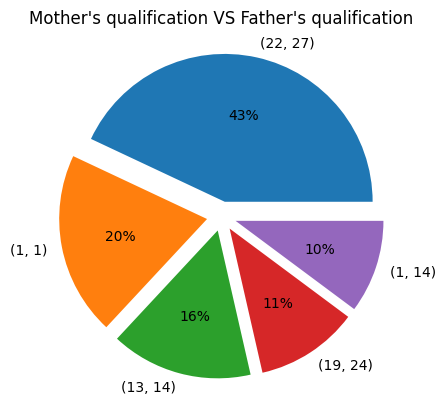

In [34]:
pie_plot_socioeconomic("Mother's qualification","Father's qualification",5)

- Un 43% de los padres tienen cualificaciones de Curso general de Administración y Comercio, Educación básica 1º ciclo (4º/5º año) o equivalente. Un 20% cualificaciones de Educación Secundaria y un 16% Curso técnico-profesional o Ciclo básico de educación 3º.

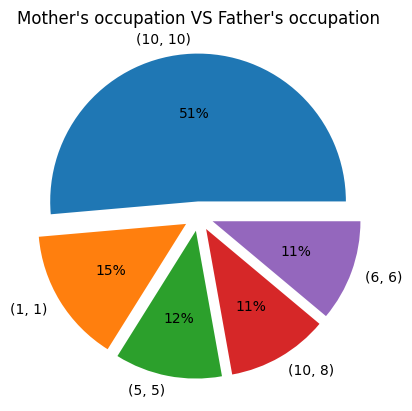

In [35]:
pie_plot_socioeconomic("Mother's occupation","Father's occupation",5)

- EL 51% de los padres de los estudiantes se situan en puestos como trabajadores no calificados, el 15% estudian y el 12% otras situaciónes.

**Comparamos características mas relevantes tanto demográficas como socioeconómicas**

In [77]:
sociodemographic_features = df.loc[df['Target']=='Dropout', ['Marital status', 'Nacionality', 'Displaced', 'Gender', 
                                                             'Age at enrollment', 'International',
                                                             "Father's qualification","Mother's qualification","Father's occupation",
                                                             "Mother's occupation",'Educational special needs','Debtor',
                                                             'Tuition fees up to date', 'Scholarship holder']]

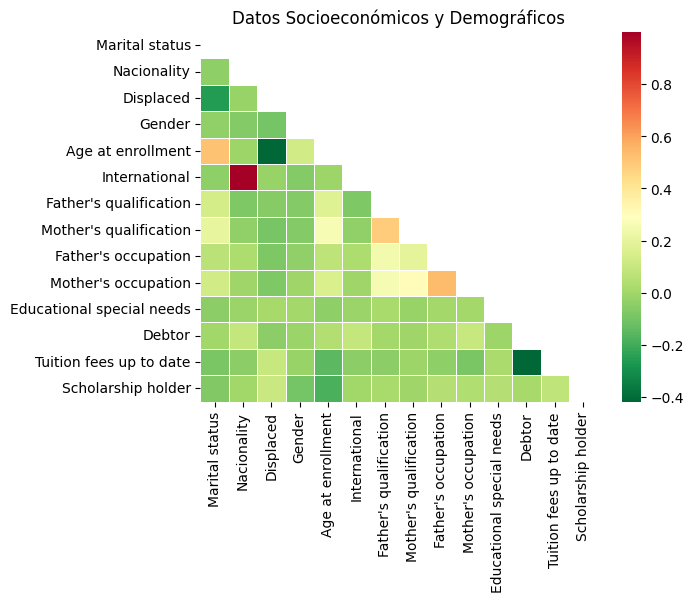

In [78]:
# Mapa de correlaciones entre caractersticas socioeconomicas y demograficas
corr_sociodemographic_features= sociodemographic_features.corr(method='spearman')
mask = np.triu(np.ones_like(corr_sociodemographic_features, dtype=bool))
sns.heatmap(data=corr_sociodemographic_features,mask=mask,cmap='RdYlGn_r', annot=False, linewidths=.5)
plt.title('Datos Socioeconómicos y Demográficos')
plt.show()

In [75]:
def pie_plot_demographic_socioeconomics(feature1: str, feature2: str,num_features_show: int):
    """Mostramos un grafico de pie (tarta) pasadas dos características socioeconómicas y demográficas
        el numero de caracteristicas a mostrar.

    Args:
        feature1 (str): Primera caracteristica 
        feature2 (str): Segunda característica 
        num_features_show (int): numero de característacas a mostrar (recomendamos no mas de 3)

    return: retorna el grafico.
    """
    data=sociodemographic_features[[feature1, feature2]].value_counts()
    labels = [str(label) for label in data.index][:num_features_show]
    sizes = data.values
    sizes = sorted(sizes, reverse=True)[:num_features_show]
    myexplode = [0.1]*len(sizes)
    plt.pie(sizes, labels=labels,explode=myexplode, autopct='%1.0f%%')
    plt.title(f'{feature1} VS {feature2}')
    plt.show()

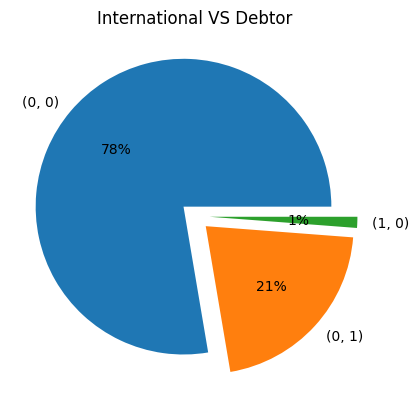

In [66]:
pie_plot_demographic_socioeconomics('International','Debtor',3)

- La mayoria 78% de los estudiantes que no tienen deudas son locales, el 21% con deudas también son locales. El 1% son internacionales no deudores.

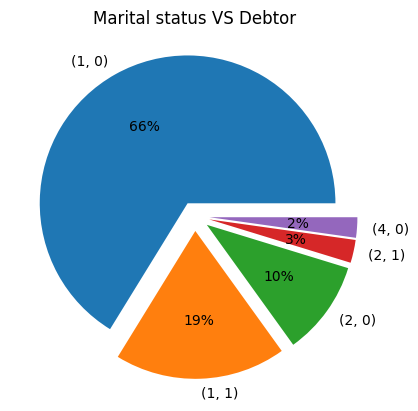

In [71]:
pie_plot_demographic_socioeconomics('Marital status',"Debtor",5)

- El estado marital no presenta observaciones relevantes con respecto a las deudas contraidas o no contraidas.

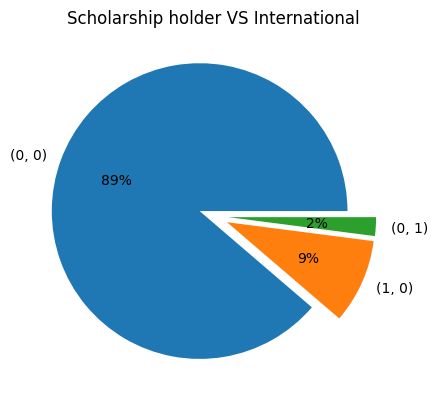

In [84]:
pie_plot_demographic_socioeconomics('Scholarship holder',"International",3)

- La mayoria de los estudiantes locales no disponen de una beca (89%), el 9% local sí, mientras que el 2% internacional no contrae becas.

### Conclusiones Finales
Las características mas relevantes en torno a los estudiantes que abandonan sus estudios son:
- La mayoria son estudiantes locales (Portugueses) en estado de soltería.
- El rango de edad de los estudiantes que abandonan se situa entre los 18-24 años.
- Los padres de estos estudiantes ostentan cualificaciónes relativamente bajas.
- Dichos padres ocupan puestos del mismo calibre que las cualificaciónes (con menor redito económico, algunos incluso estudiando).
- La mayoria de los estudiantes no contraen deudas.
- La mayoria de los estudiantes no tienen una beca.